In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [147]:
# Load the Titanic dataset
df = pd.read_csv('titanic_toy.csv')
df.head(3)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1


In [148]:
# Check the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [149]:
# Extract the required columns for imputation
X = df.drop(columns=['Survived'], axis=1)
y = df[['Survived']]

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [152]:
si_age_mean = SimpleImputer() # default strategy is mean
si_age_median = SimpleImputer(strategy='median')

X_train['Age_Mean'] = si_age_mean.fit_transform(X_train[['Age']])
X_train['Age_Median'] = si_age_median.fit_transform(X_train[['Age']])

X_train.sample(5)

,Age,Fare,Family,Age_Mean,Age_Median
115,21.0,7.9250,0,21.000000,21.0
864,24.0,13.0000,0,24.000000,24.0
780,13.0,7.2292,0,13.000000,13.0
568,NaN,7.2292,0,29.498846,28.0
595,36.0,24.1500,2,36.000000,36.0


In [153]:
si_age_fare = SimpleImputer() # default strategy is mean
si_age_fare = SimpleImputer(strategy='median')

X_train['Fare_Mean'] = si_age_mean.fit_transform(X_train[['Fare']])
X_train['Fare_Median'] = si_age_median.fit_transform(X_train[['Fare']])

X_train.sample(5)

,Age,Fare,Family,Age_Mean,Age_Median,Fare_Mean,Fare_Median
381,1.0,15.7417,2,1.000000,1.0,15.741700,15.7417
325,36.0,135.6333,0,36.000000,36.0,135.633300,135.6333
553,22.0,7.2250,0,22.000000,22.0,7.225000,7.2250
825,NaN,6.9500,0,29.498846,28.0,6.950000,6.9500
860,41.0,NaN,2,41.000000,41.0,32.517788,14.4000


## 3 Things to Check After Imputation

1. Distribution Before and After Imputation
2. Variance
3. Corelation and Covariance between the features
4. Creates new Outliers 

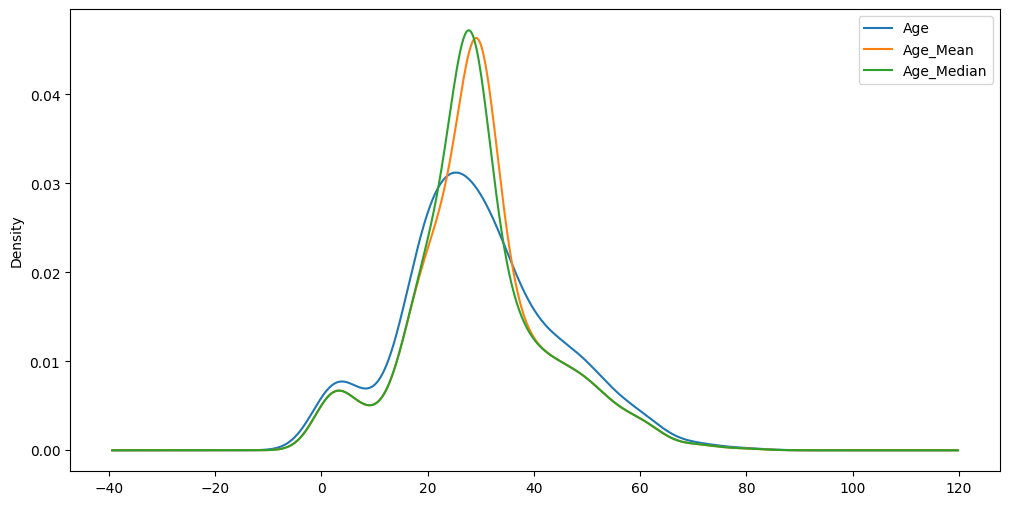

In [154]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# Original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# After imputed with the mean
X_train['Age_Mean'].plot(kind='kde', ax=ax)

# After imputed with the median
X_train['Age_Median'].plot(kind='kde', ax=ax)

# Add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

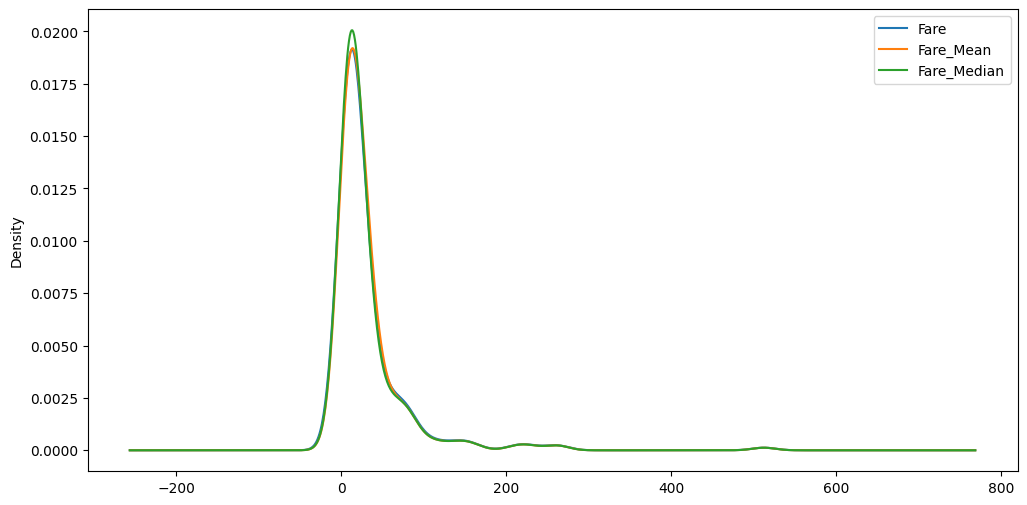

In [155]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# Original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# After imputed with the mean
X_train['Fare_Mean'].plot(kind='kde', ax=ax)

# After imputed with the median
X_train['Fare_Median'].plot(kind='kde', ax=ax)

# Add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [156]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after mean imputation: ', X_train['Age_Mean'].var())
print('Age Variance after median imputation: ', X_train['Age_Median'].var())
print('=======================================================================')
print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_Mean'].var())
print('Fare Variance after median imputation: ', X_train['Fare_Median'].var())


Original Age variable variance:  210.2517072477435
Age Variance after mean imputation:  168.85193366872227
Age Variance after median imputation:  169.20731007048155
Original Fare variable variance:  2761.0314349486343
Fare Variance after mean imputation:  2621.232374951235
Fare Variance after median imputation:  2637.012481677765


In [157]:
X_train.cov()

,Age,Fare,Family,Age_Mean,Age_Median,Fare_Mean,Fare_Median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
Age_Mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
Age_Median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
Fare_Mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
Fare_Median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [158]:
X_train.corr()

,Age,Fare,Family,Age_Mean,Age_Median,Fare_Mean,Fare_Median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
Age_Mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
Age_Median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
Fare_Mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
Fare_Median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


<Axes: >

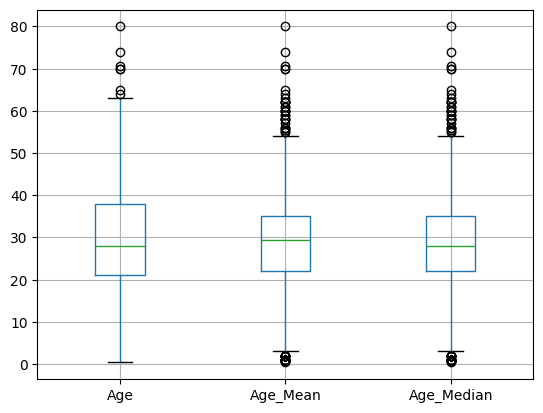

In [159]:
X_train[['Age', 'Age_Mean', 'Age_Median']].boxplot()

<Axes: >

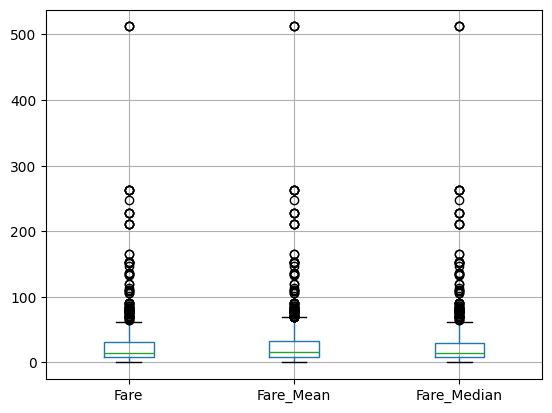

In [160]:
X_train[['Fare', 'Fare_Mean', 'Fare_Median']].boxplot()